# Laborator 6

## Modele de clasificare

Folositi 5 seturi de date pentru probleme de clasificare, plecand de la repository-urile specificate in Cursul 6. Toate seturile de date trebuie sa aiba valori precizate (adica sa fie fara valori lipsa) si sa aiba macar o trasatura de intrare variabila categoriala nominala.

1. Transformati trasaturile categoriale nominale folosind one hot encoding, https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html. 
1. (numar de modele * numar de seturi de date \* 1 punct = 30 de puncte) Pentru fiecare set de date aplicati 6 modele de clasificare din scikit learn. Pentru fiecare raportati: acuratete, precision, recall, scorul F1 - a se vedea [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall) - folosind 10 fold cross validation. Raportati mediile rezultatelor atat pentru fold-urile de antrenare, cat si pentru cele de testare. Rularile se vor face cu valori fixate ale hiperparametrilor. 
3. (numar de modele * numar de seturi de date * 1 punct = 30 de puncte) Raportati performanta fiecarui model, folosind 10 fold cross validation. Pentru fiecare din cele 10 rulari, cautati hiperparametrii optimi folosind 4-fold cross validation. Performanta modelului va fi raportata ca medie a celor  10 rulari. 
    *Observatie:* la fiecare din cele 10 rulari, hiperparametrii optimi pot diferi, din cauza datelor utilizate pentru antrenare/validare. 
3. (numar modele * 4 puncte = 20 puncte) Documentati in jupyter notebook fiecare din modelele folosite, in limba romana. Daca acelasi algoritm e folosit pentru mai multe seturi de date, puteti face o sectiune separata cu documentarea algoritmilor + trimitere la algoritm. 

Se acorda 20 de puncte din oficiu. 

Exemple de modele de clasificare:
1. [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
1. [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
1. [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
1. [Gaussian processes](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier)
1. [RBF](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html#sklearn.gaussian_process.kernels.RBF)
1. [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
1. [Random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
1. [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) 

In [1]:
import pandas as pd
import sklearn

## 1.
### census income

In [2]:
df:pd.DataFrame = pd.read_csv('data/census_income.csv')

# Verificare valori lipsă
df.info()
# înlocuire ? cu NaN
df.replace('?', pd.NA, inplace=True)
#șterge liniile care conțin cel puțin un NaN
df = df.dropna()

# Aplicare one-hot encoding pe trasaturile categoriale nominale
one_hot_encoded_df:pd.DataFrame = pd.get_dummies(df, columns=['workclass','marital-status','occupation','relationship','race','sex','native-country','income'])
one_hot_encoded_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,39,77516,Bachelors,13,2174,0,40,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,Bachelors,13,0,0,13,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,HS-grad,9,0,0,40,False,False,True,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,11th,7,0,0,40,False,False,True,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,Bachelors,13,0,0,40,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,0,0,38,False,False,True,...,False,False,False,False,False,True,False,False,True,False
32557,40,154374,HS-grad,9,0,0,40,False,False,True,...,False,False,False,False,False,True,False,False,False,True
32558,58,151910,HS-grad,9,0,0,40,False,False,True,...,False,False,False,False,False,True,False,False,True,False
32559,22,201490,HS-grad,9,0,0,20,False,False,True,...,False,False,False,False,False,True,False,False,True,False


### data auction verification

In [3]:
auction_df:pd.DataFrame = pd.read_csv('data/data_auction_verification.csv')

# Verificare valori lipsă
auction_df.info()
auction_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000


### diabetes data

In [4]:
diabet_df:pd.DataFrame = pd.read_csv('data/diabetes_data_upload.csv')

# Verificare valori lipsă
diabet_df.info()

# Aplicare one-hot encoding pe trasaturile categoriale nominale
one_hot_encoded_diabet_df:pd.DataFrame = pd.get_dummies(diabet_df, columns=['Gender','class'])
one_hot_encoded_diabet_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Gender_Female,Gender_Male,class_Negative,class_Positive
0,40,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,False,True,False,True
1,58,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,False,True,False,True
2,41,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,False,True,False,True
3,45,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,False,True,False,True
4,60,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,True,False,False,True
516,48,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,True,False,False,True
517,58,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,True,False,False,True
518,32,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,True,False,True,False


### Airlines Reviews After Cleaning

In [5]:
airlines_df:pd.DataFrame = pd.read_csv('data/Airlines_Reviews After Cleaning.csv')

# Verificare valori lipsă
airlines_df.info()

# Aplicare one-hot encoding pe trasaturile categoriale nominale
one_hot_encoded_airlines_df:pd.DataFrame = pd.get_dummies(airlines_df, columns=['Country','Type_of_Travellers','Seat_Types'])
one_hot_encoded_airlines_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Users Reviews        2761 non-null   object
 1   Country              2761 non-null   object
 2   Type_of_Travellers   2761 non-null   object
 3   Seat_Types           2761 non-null   object
 4   Seat Comfort         2761 non-null   int64 
 5   Cabin Staff Service  2761 non-null   int64 
 6   Value For Money      2761 non-null   int64 
 7   Recommended          2761 non-null   object
dtypes: int64(3), object(5)
memory usage: 172.7+ KB


,Users Reviews,Seat Comfort,Cabin Staff Service,Value For Money,Recommended,Country_Argentina,Country_Australia,Country_Austria,Country_Belgium,Country_Bermuda,...,Country_United States,Country_Vietnam,Type_of_Travellers_Business,Type_of_Travellers_Couple Leisure,Type_of_Travellers_Family Leisure,Type_of_Travellers_Solo Leisure,Seat_Types_Business Class,Seat_Types_Economy Class,Seat_Types_First Class,Seat_Types_Premium Economy
0,✅Trip Verified| Cancelled our flight last-min...,1,1,1,no,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,"✅Trip Verified| I had a flight from Miami, Flo...",1,3,1,no,False,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False
2,✅Trip Verified| We started our day with BA in...,1,3,1,no,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
3,✅Trip Verified| I fly British Airways weekly ...,1,1,1,no,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,Not Verified| Everything was ok until our con...,3,2,3,no,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,LHR to YVR return. Hard earned Avios points tr...,4,5,5,yes,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2757,Club World from LHR-ORD. Busy flight on the ag...,4,2,3,yes,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2758,This review refers to a return trip from India...,4,1,3,no,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2759,This review concerns LHR-BOM in Business Class...,2,5,3,yes,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


### ObesityDataSet raw and data sinthetic

In [6]:
obesity_df:pd.DataFrame = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

# Verificare valori lipsă
obesity_df.info()

#one-hot encoding pe trasaturile categoriale nominale
one_hot_encoded_obesity_df:pd.DataFrame = pd.get_dummies(obesity_df, columns=['Gender','MTRANS'])
one_hot_encoded_obesity_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,TUE,CALC,NObeyesdad,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,...,1.000000,no,Normal_Weight,True,False,False,False,False,True,False
1,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,...,0.000000,Sometimes,Normal_Weight,True,False,False,False,False,True,False
2,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,...,1.000000,Frequently,Normal_Weight,False,True,False,False,False,True,False
3,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,...,0.000000,Frequently,Overweight_Level_I,False,True,False,False,False,False,True
4,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,...,0.000000,Sometimes,Overweight_Level_II,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,...,0.906247,Sometimes,Obesity_Type_III,True,False,False,False,False,True,False
2107,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,...,0.599270,Sometimes,Obesity_Type_III,True,False,False,False,False,True,False
2108,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,...,0.646288,Sometimes,Obesity_Type_III,True,False,False,False,False,True,False
2109,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,...,0.586035,Sometimes,Obesity_Type_III,True,False,False,False,False,True,False


## 2.  Pentru fiecare set de date aplicati 6 modele de clasificare din scikit learn. Pentru fiecare raportati: acuratete, precision, recall, scorul F1 - a se vedea sklearn.metrics, Precision and recall - folosind 10 fold cross validation. Raportati mediile rezultatelor atat pentru fold-urile de antrenare, cat si pentru cele de testare. Rularile se vor face cu valori fixate ale hiperparametrilor.

In [7]:
X_income:pd.DataFrame = one_hot_encoded_df.drop(['income_<=50K', 'income_>50K'], axis=1)
print(X_income.iloc[0:5, :])

Y_income:pd.Series = one_hot_encoded_df['income_>50K']
print(Y_income)

class_counts:pd.Series = one_hot_encoded_df['income_>50K'].value_counts()
class_names:pd.Index = class_counts.index
print(class_names)

   age  fnlwgt  education  education-num  capital-gain  capital-loss  \
0   39   77516  Bachelors             13          2174             0   
1   50   83311  Bachelors             13             0             0   
2   38  215646    HS-grad              9             0             0   
3   53  234721       11th              7             0             0   
4   28  338409  Bachelors             13             0             0   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0              40                  False                False   
1              13                  False                False   
2              40                  False                False   
3              40                  False                False   
4              40                  False                False   

   workclass_Private  ...  native-country_Portugal  \
0              False  ...                    False   
1              False  ...                    False   
2             

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_income, Y_income, test_size=1/3, shuffle=True)
print(y_test)

10720    False
5367     False
31185     True
26074     True
7434     False
         ...  
11617     True
6683     False
19489    False
20993    False
6940     False
Name: income_>50K, Length: 10054, dtype: bool


In [9]:
from collections import Counter

#E util sa se observe daca clasele sunt distribuite echilibrat:
print(Counter(y_train))
print(Counter(y_test))

Counter({False: 15075, True: 5033})
Counter({False: 7579, True: 2475})


In [10]:
import matplotlib.pyplot as plt
import numpy as np

print(f'np.__version__={np.__version__}')

np.__version__=1.26.2


False
True


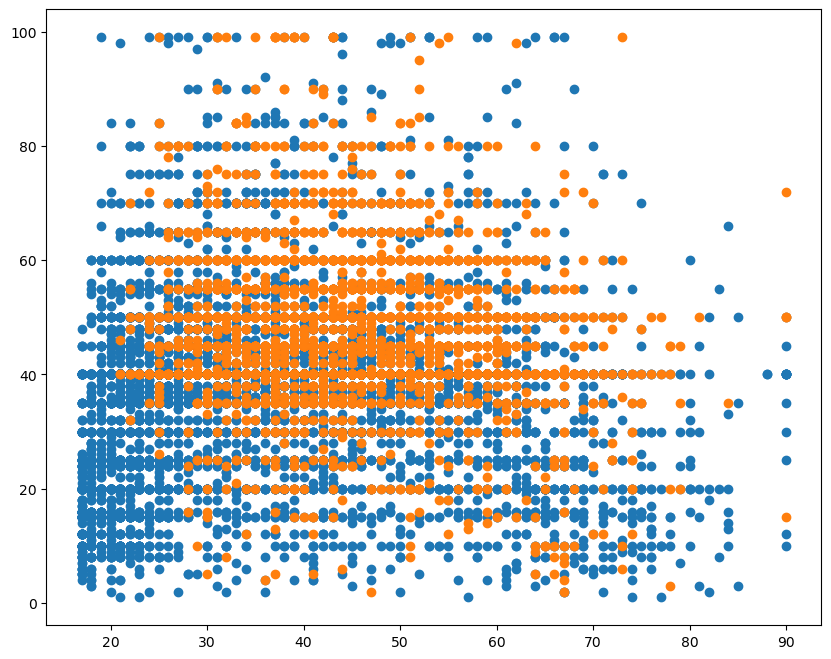

In [11]:
plt.figure(figsize=(10, 8))
for class_label in class_names:
    print(class_label)
    that_income:pd.DataFrame = X_train[y_train == class_label]
    plt.scatter(that_income['age'], that_income['hours-per-week'], label=str(class_label))
plt.show()

In [12]:
X_auction:pd.DataFrame = auction_df.drop("verification.result", axis=1)
print(X_auction.iloc[0:5, :])

y_auction:pd.Series = auction_df["verification.result"]

target_names_df_2:np.ndarray = auction_df["verification.result"].unique()
print(target_names_df_2)

   process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                    0                    0                    2   
1                    0                    0                    2   
2                    0                    0                    2   
3                    0                    0                    2   
4                    0                    0                    2   

   process.b4.capacity  property.price  property.product  property.winner  \
0                    1              59                 1                0   
1                    1              59                 2                0   
2                    1              59                 4                0   
3                    1              59                 6                0   
4                    1              60                 1                0   

   verification.time  
0         163.316667  
1         200.860000  
2         154.888889  
3         108.640000  
4          85

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_auction, y_auction, test_size=1/3, shuffle=True)
print(y_test)

1799    False
1706    False
1798    False
1731    False
26      False
        ...  
1846    False
1813    False
907     False
630     False
1683    False
Name: verification.result, Length: 681, dtype: bool


In [14]:
#E util sa se observe daca clasele sunt distribuite echilibrat:
print(Counter(y_train))
print(Counter(y_test))

Counter({False: 1182, True: 180})
Counter({False: 599, True: 82})


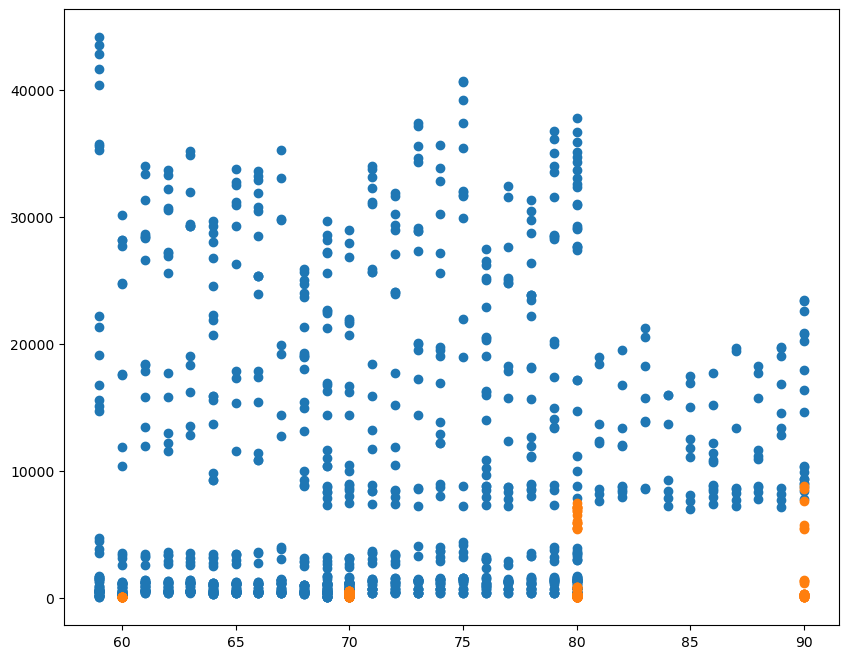

In [15]:
plt.figure(figsize=(10, 8))
for class_label in class_names:
    that_auction:pd.DataFrame = X_train[y_train == class_label]
    plt.scatter(that_auction.iloc[:, 4], that_auction.iloc[:, 7], label=str(class_label))
plt.show()

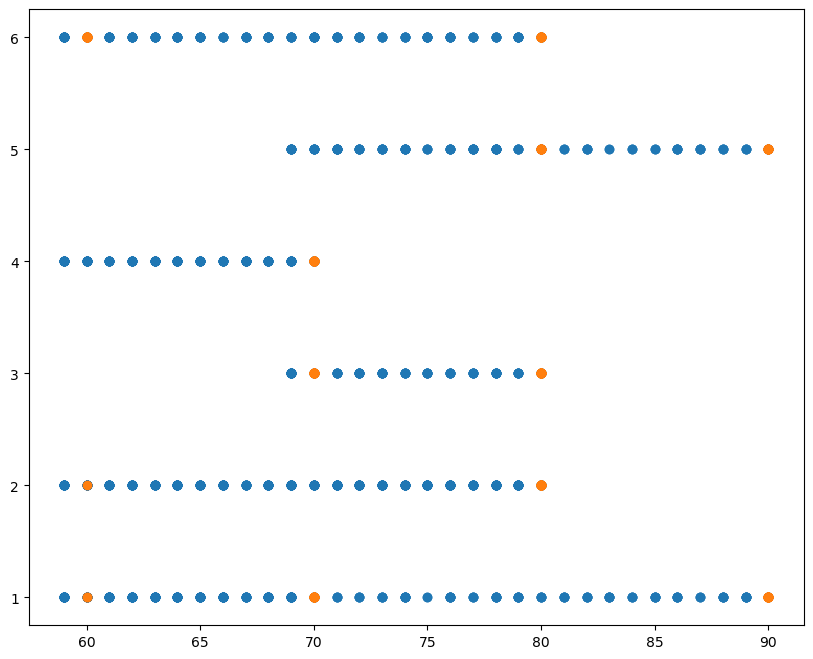

In [16]:
plt.figure(figsize=(10, 8))
for class_label in class_names:
    that_auction:pd.DataFrame = X_train[y_train == class_label]
    plt.scatter(that_auction.iloc[:, 4], that_auction.iloc[:, 5], label=str(class_label))
plt.show()

In [17]:
X_diabet:pd.DataFrame = one_hot_encoded_diabet_df.drop(['class_Negative'], axis=1)
print(X_diabet.iloc[0:5, :])

y_diabet:pd.Series = one_hot_encoded_diabet_df['class_Negative']


class_names:np.ndarray = one_hot_encoded_diabet_df['class_Negative'].unique()
print(class_names)

   Age Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40       No        Yes                 No      Yes         No   
1   58       No         No                 No      Yes         No   
2   41      Yes         No                 No      Yes        Yes   
3   45       No         No                Yes      Yes        Yes   
4   60      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity  Gender_Female  \
0              No              Yes      Yes     Yes          False   
1     

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_diabet, y_diabet, test_size=1/3, shuffle=True)
print(y_test)

483    False
180    False
438    False
368    False
188    False
       ...  
354     True
253    False
280     True
224     True
281     True
Name: class_Negative, Length: 174, dtype: bool


In [19]:
#E util sa se observe daca clasele sunt distribuite echilibrat:
print(Counter(y_train),Counter(y_test), sep='\n')

Counter({False: 216, True: 130})
Counter({False: 104, True: 70})


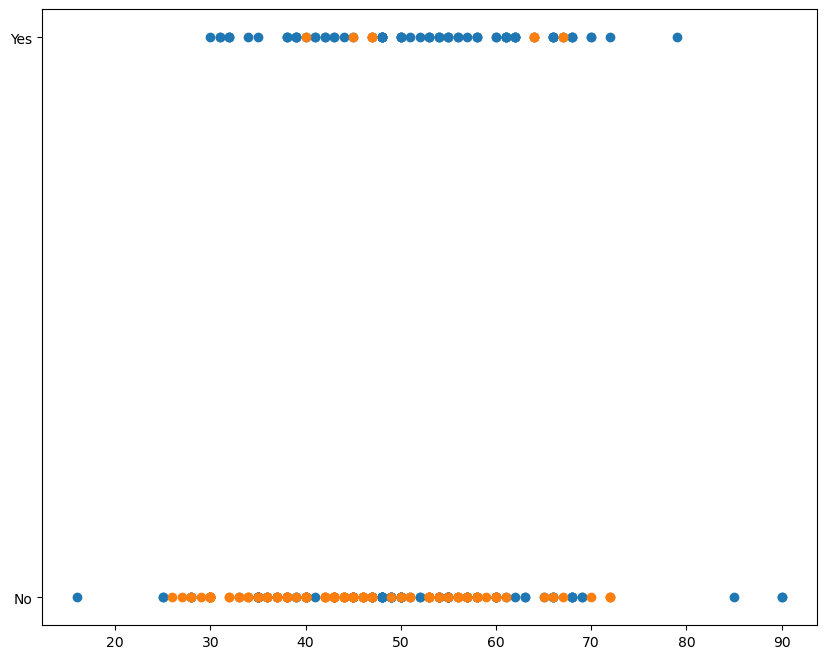

In [20]:
plt.figure(figsize=(10, 8))
for class_label in class_names:
    that_diabet:pd.DataFrame = X_train[y_train == class_label]
    plt.scatter(that_diabet['Age'], that_diabet['Irritability'], label=str(class_label))
plt.show()

In [21]:
X_airlines:pd.DataFrame = one_hot_encoded_airlines_df.drop('Seat Comfort', axis=1)
print(X_airlines.iloc[0:5, :])

y_airlines:pd.Series = one_hot_encoded_airlines_df['Seat Comfort']

target_names_df_4:np.ndarray = one_hot_encoded_airlines_df['Seat Comfort'].unique()
print(target_names_df_4)

                                       Users Reviews  Cabin Staff Service  \
0  ✅Trip Verified|  Cancelled our flight last-min...                    1   
1  ✅Trip Verified| I had a flight from Miami, Flo...                    3   
2  ✅Trip Verified|  We started our day with BA in...                    3   
3  ✅Trip Verified|  I fly British Airways weekly ...                    1   
4  Not Verified|  Everything was ok until our con...                    2   

   Value For Money Recommended  Country_Argentina  Country_Australia  \
0                1          no              False              False   
1                1          no              False              False   
2                1          no              False              False   
3                1          no              False              False   
4                3          no              False              False   

   Country_Austria  Country_Belgium  Country_Bermuda  Country_Botswana  ...  \
0            False       

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_airlines, y_airlines, test_size=1/3, shuffle=True)
print(y_test)

1257    1
669     4
2213    4
1693    1
1198    3
       ..
1651    1
107     3
1733    5
704     1
2188    2
Name: Seat Comfort, Length: 921, dtype: int64


In [23]:
#E util sa se observe daca clasele sunt distribuite echilibrat:
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 460, 3: 438, 4: 402, 2: 323, 5: 217})
Counter({3: 231, 1: 220, 4: 188, 2: 160, 5: 122})


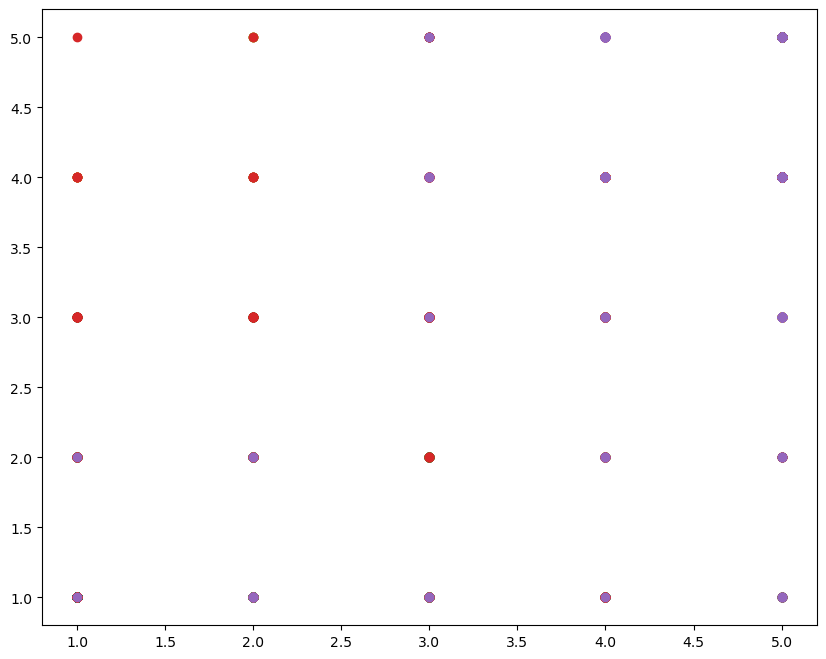

In [24]:
plt.figure(figsize=(10, 8))
for class_label in target_names_df_4:
    that_airlines:pd.DataFrame = X_train[y_train == class_label]
    plt.scatter(that_airlines['Cabin Staff Service'], that_airlines['Value For Money'], label=str(class_label))
plt.show()

In [25]:
X_obesity:pd.DataFrame = obesity_df.drop("MTRANS", axis=1)
print(X_obesity.iloc[0:5, :])

y_obesity:pd.Series = obesity_df["MTRANS"]

target_names_df_5:np.ndarray = obesity_df["MTRANS"].unique()
print(target_names_df_5)

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC           NObeyesdad  
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no        Normal_Weight  
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes        Normal_Weight  
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently        Normal_Weight  
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   Overweight_Level_I  
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Overweight_Level_II  
['Public_Transportation' 'Walking' 'Automobile' 'Motorbik

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_obesity, y_obesity, test_size=1/3, shuffle=True)
print(y_test)

1266               Automobile
1594    Public_Transportation
1982    Public_Transportation
1975    Public_Transportation
1832    Public_Transportation
                ...          
421                Automobile
274     Public_Transportation
1977    Public_Transportation
328                   Walking
1834    Public_Transportation
Name: MTRANS, Length: 704, dtype: object


In [27]:
#E util sa se observe daca clasele sunt distribuite echilibrat:
print(Counter(y_train), Counter(y_test), sep='\n')

Counter({'Public_Transportation': 1065, 'Automobile': 297, 'Walking': 34, 'Motorbike': 7, 'Bike': 4})
Counter({'Public_Transportation': 515, 'Automobile': 160, 'Walking': 22, 'Motorbike': 4, 'Bike': 3})


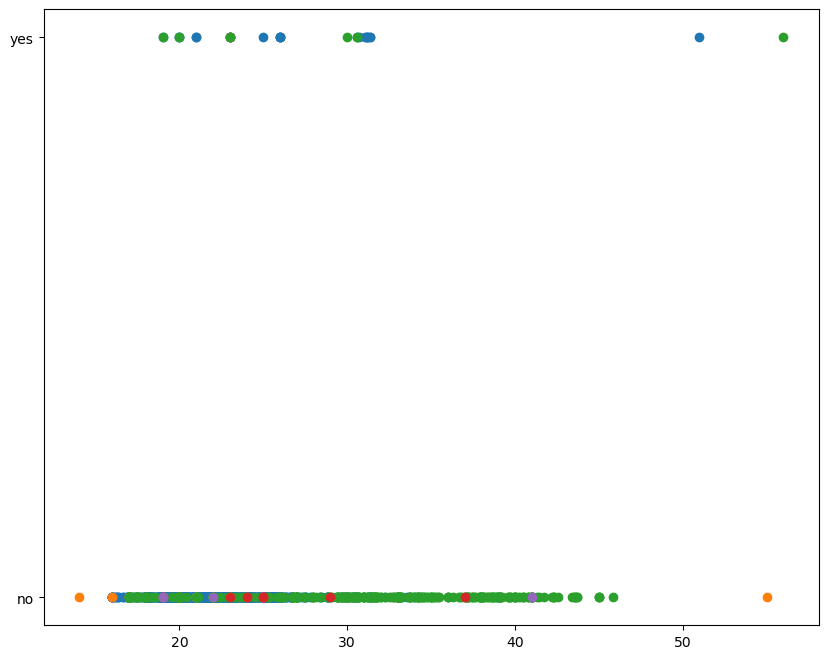

In [28]:
plt.figure(figsize=(10, 8))
for class_label in target_names_df_5:
    that_obesity:pd.DataFrame = X_train[y_train == class_label]
    plt.scatter(that_obesity['Age'], that_obesity['SMOKE'], label=str(class_label))
plt.show()

## 3. Raportati performanta fiecarui model, folosind 10 fold cross validation. Pentru fiecare din cele 10 rulari, cautati hiperparametrii optimi folosind 4-fold cross validation. Performanta modelului va fi raportata ca medie a celor 10 rulari. Observatie: la fiecare din cele 10 rulari, hiperparametrii optimi pot diferi, din cauza datelor utilizate pentru antrenare/validare.

## 4. Documentati in jupyter notebook fiecare din modelele folosite, in limba romana. Daca acelasi algoritm e folosit pentru mai multe seturi de date, puteti face o sectiune separata cu documentarea algoritmilor + trimitere la algoritm.

*Predare:* 
1. Predarea se face cel tarziu in 22 noiembrie 2023 ora 23, in lucrarea de pe elearning (Tema 5). 
1. Obligatoriu: type annotations pentru variabile, parametri, tip de retur; docstrings. 
1. Fisierele de date folosite vor fi descarcate local de studenti si puse intr-un director "data". Se va realiza o arhiva zip care contine minim: fiserul/fisierele ipynb si directorul de date. Suplimentar, pot fi folosite imagini incluse in ipynb; acestea vor fi puse in directorul "images" ce se va include in arhiva zip predata.